Status: Optimal
Solution: {'P1': 26.666667, 'P2': 36.666667}
Total Profit: 1633.3333499999999


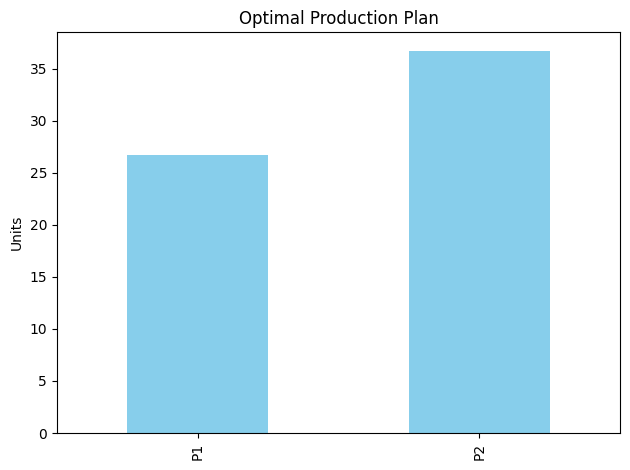

In [8]:
import pulp
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
df = pd.read_csv("input_data.csv")

# Extract sets and parameters
products = df['product'].tolist()
profit = dict(zip(df['product'], df['profit']))
usage_M1 = dict(zip(df['product'], df['M1_usage']))
usage_M2 = dict(zip(df['product'], df['M2_usage']))

# Resource availability
availability = {"M1": 100, "M2": 90}

# Create LP problem
prob = pulp.LpProblem("Production_Planning", pulp.LpMaximize)

# Decision variables
x = pulp.LpVariable.dicts("prod", products, lowBound=0, cat="Continuous")

# Objective function
prob += pulp.lpSum([profit[p] * x[p] for p in products]), "Total_Profit"

# Constraints
prob += pulp.lpSum([usage_M1[p] * x[p] for p in products]) <= availability["M1"], "Machine_1"
prob += pulp.lpSum([usage_M2[p] * x[p] for p in products]) <= availability["M2"], "Machine_2"

# Solve
prob.solve()

# Results
status = pulp.LpStatus[prob.status]
solution = {p: x[p].value() for p in products}
objective_value = pulp.value(prob.objective)

print("Status:", status)
print("Solution:", solution)
print("Total Profit:", objective_value)

# Save results to CSV
df_out = pd.DataFrame.from_dict(solution, orient='index', columns=["units"])
df_out["profit_per_unit"] = df_out.index.map(lambda p: profit[p])
df_out["total_profit"] = df_out["units"] * df_out["profit_per_unit"]
df_out.to_csv("solution.csv")

# Plot
plt.figure()
df_out["units"].plot(kind="bar", color="skyblue")
plt.title("Optimal Production Plan")
plt.ylabel("Units")
plt.tight_layout()
plt.savefig("output/production_plot.png")
plt.show()